In [14]:
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
from PySDM_examples.Shipway_and_Hill_2012 import Simulation, Settings, plot
from PySDM.physics import si

In [15]:
n_sd_per_gridbox = 10
dt = 25*si.s
dz = 100*si.m
rho_times_w = 3*si.m/si.s

output = Simulation(Settings(n_sd_per_gridbox=n_sd_per_gridbox, rho_times_w_1=rho_times_w, dt=dt, dz=dz, precip=False)).run()

In [22]:
t_sdm = output["t"]
z_sdm = output["z"]
rhod_sdm0 = output["rhod"][:,0]
qv_sdm0 = output["qv"][:,0]
thetad_sdm0 = output["thd"][:,0]
T_sdm0 = output["T"][:,0]

In [9]:
ds_julia = xr.open_dataset("../Output.nc", group="profiles")

In [12]:
ds_julia0 = ds_julia.isel(t=0)

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

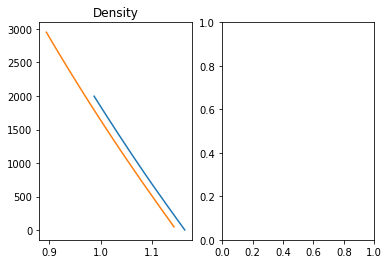

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].plot(ds_julia0['density'], ds_julia0['zc'], label='Kinematic1d.jl density')
ax[0].plot(rhod_sdm0, z_sdm, label="PySDM rho_d")
ax[0].set_title('Density')
ax[0].set_xlabel('Density (kg/m3)')
ax[0].set_ylabel('z (m)')
ax[0].legend()

ax[1].plot(ds_julia0['temperature'], ds_julia0['zc'], label='Kinematic1d.jl T')
ax[1].plot(T_sdm0, z_sdm, label="PySDM T")
ax[1].set_title('Temperature')
ax[1].set_xlabel('T (K)')
ax[1].set_ylabel('z (m)')
ax[1].legend()